# Copyright

<PRE>
This notebook was created as part of the "Deep learning / VITMMA19" class at
Budapest University of Technology and Economics, Hungary,
https://portal.vik.bme.hu/kepzes/targyak/VITMMA19.

Any re-use or publication of any part of the notebook is only allowed with the
written consent of the authors.

2024 (c) Mohammed Salah Al-Radhi (malradhi@tmit.bme.hu)
</PRE>

# Regression example
This Jupyter Notebook contains a basic example of regression with linear regression, random forest and a deep neural network. The dataset we will use is the insurance dataset, which contains information about individuals and their medical insurance costs. We will preprocess the data, visualize it, and train different models on it. Finally, we will evaluate the models and compare their performance.
First, we install [Pytorch Lightning](https://lightning.ai/), which will be used as an easy-to-use interface to PyTorch.


In [1]:
!pip install pytorch-lightning --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 22.6 MB/s eta 0:00:00


## Data
Download the dataset:

In [2]:
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

--2024-10-29 21:48:52--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.001s  

2024-10-29 21:48:52 (98.5 MB/s) - ‘insurance.csv’ saved [54288/54288]



## Imports
Importing libraries for data preprocessing & visualization:

In [3]:
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for linear algebra
import matplotlib.pyplot as plt # matplotlib for plotting
import seaborn as sns # seaborn for plotting

## DATA PREPROCESSING AND VISUALIZATION

A `df` dataframe is created by reading the contents of the "insurance.csv" file using pandas `read_csv()` method. The "insurance.csv" file contains information about individuals and their medical insurance costs. The `df` dataframe contains 1338 rows and 7 columns. Each row represents an individual and each column represents a feature of that individual such as age, sex, bmi, number of children, smoker or not, region and charges.

In [4]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have the column names already. There are no 'NaN' values in any of the columns.

The categorical columns contains strings, which have to convert to one-hot vectors. Fortunately, we can easily do this with pandas:

In [6]:
df = pd.get_dummies(df, drop_first=True) # we have to talk about drop_first -> avoid the dummy variable trap
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [7]:
df.dtypes

,0
age,int64
bmi,float64
children,int64
charges,float64
sex_male,bool
smoker_yes,bool
region_northwest,bool
region_southeast,bool
region_southwest,bool


In [8]:
df.iloc[:, :4] = df.iloc[:, :4].astype('float32')

<ipython-input-8-890d8b6fbeb9>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334    18.0
1335    18.0
1336    21.0
1337    61.0
Name: age, Length: 1338, dtype: float32' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, :4] = df.iloc[:, :4].astype('float32')
<ipython-input-8-890d8b6fbeb9>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.0
1       1.0
2       3.0
3       0.0
4       0.0
       ... 
1333    3.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: children, Length: 1338, dtype: float32' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, :4] = df.iloc[:, :4].astype('float32')


In [9]:
df.dtypes

,0
age,float32
bmi,float64
children,float32
charges,float64
sex_male,bool
smoker_yes,bool
region_northwest,bool
region_southeast,bool
region_southwest,bool


The following part generates a "heatmap" of pairwise correlations between the features in the `df` dataframe. The `sns.heatmap()` function from the seaborn library is used to create the heatmap. The `annot=True` parameter adds the correlation values to the heatmap.

Pairwise correlation is a measure of the linear relationship between two variables. In the context of linear regression, pairwise correlation is important because it helps us understand how each feature is related to the target variable. If two features are highly correlated, it means that they are providing similar information to the model, which can lead to overfitting. On the other hand, if two features are not correlated, it means that they are providing different information to the model, which can improve the model's performance. Therefore, it is important to check the pairwise correlations between the features before training a linear regression model.

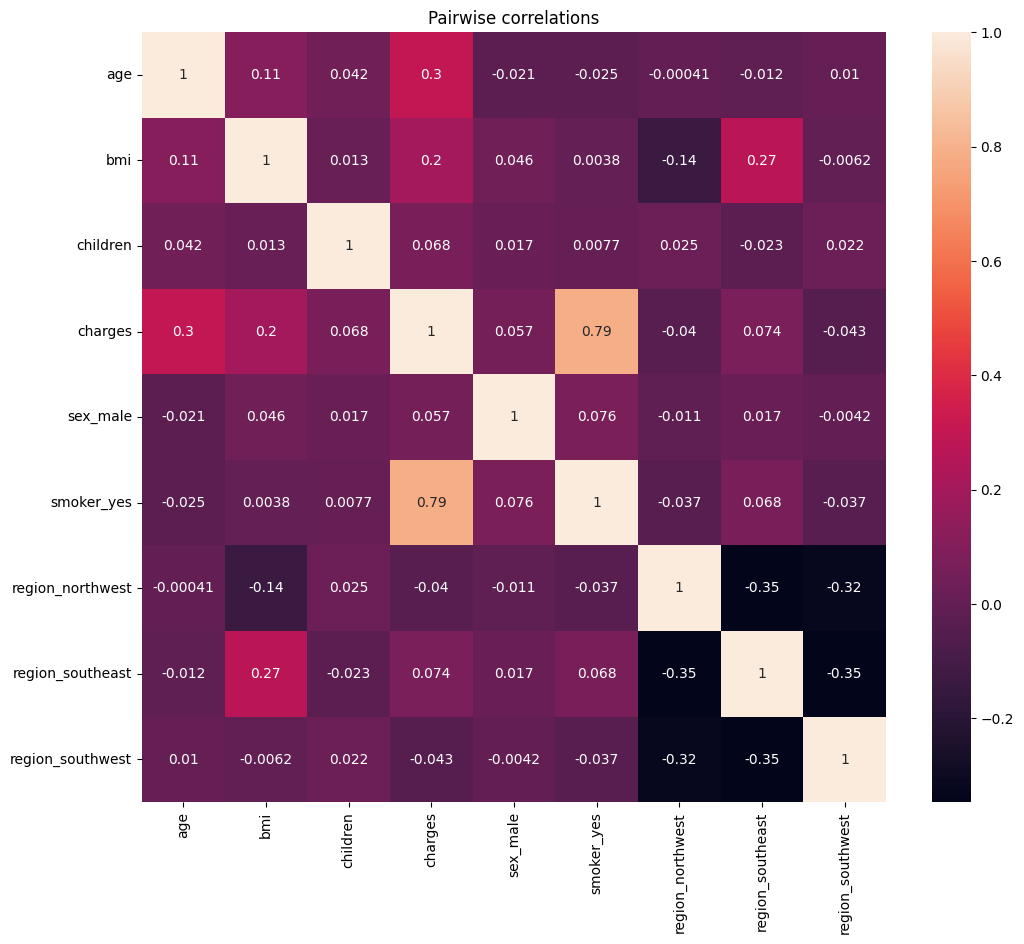

In [10]:
plt.figure(figsize=(12, 10))
plt.title('Pairwise correlations')
sns.heatmap(data=df.corr(), annot=True)
plt.show()

## Training linear regression and random forest regressors

We split the features and the target variable:


In [11]:
X = df.drop(columns=['charges']).values # features
y = df['charges'].values # label

Now we split the dataset into train and test sets, and train linear regression and random forest regressors on the test set.

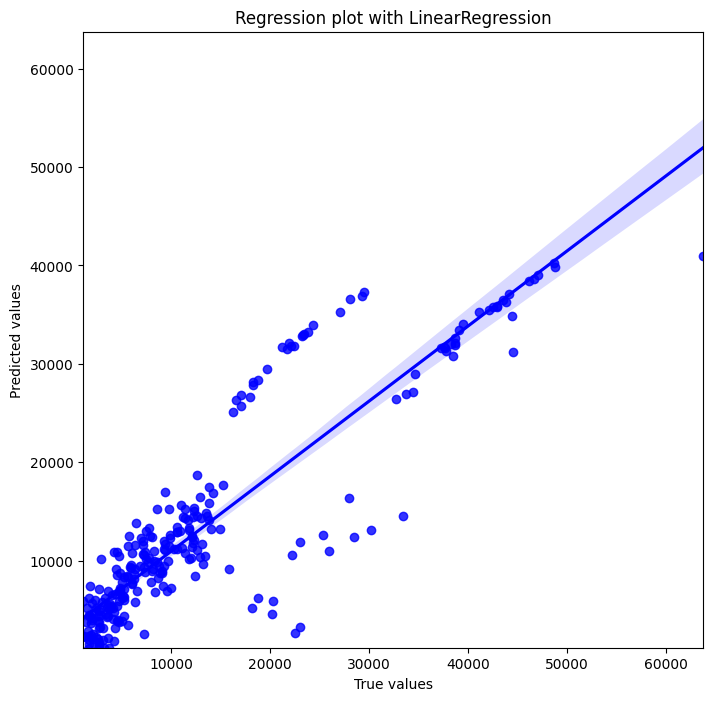

Mean absolute error: 4181.1944608448575
Coefficient of determination: 0.7835929764447832


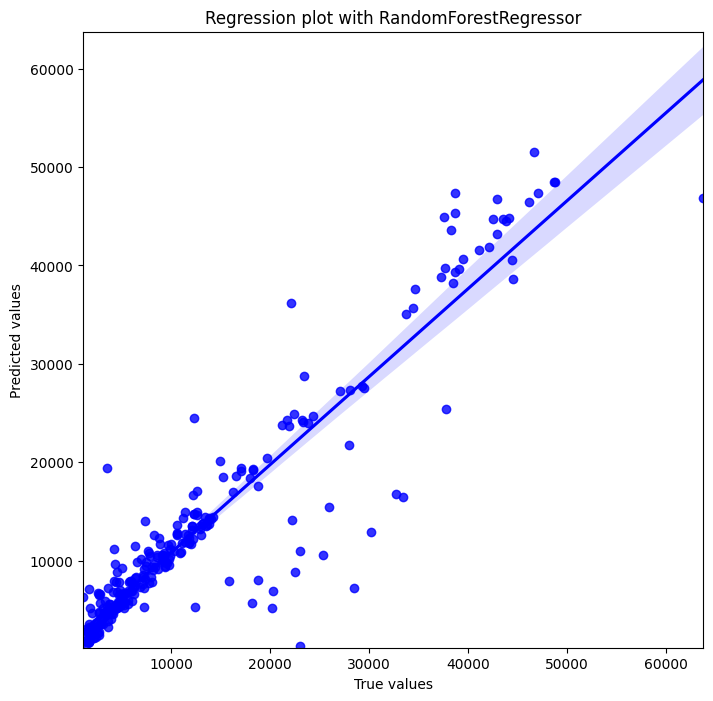

Mean absolute error: 2536.472027108762
Coefficient of determination: 0.8666530107604817


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # alternative: min-max scaling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

for model in [LinearRegression(), RandomForestRegressor()]:
  model.fit(scaler.transform(X_train), y_train)
  y_pred = model.predict(scaler.transform(X_test))
  np.save(model.__class__.__name__, y_pred)
  # regression plot
  plt.figure(figsize=(8, 8))
  sns.regplot(x=y_test, y=y_pred, scatter=True, color='b')
  plt.xlabel("True values")
  plt.ylabel("Predicted values")
  plt.xlim(min(y_test), max(y_test))
  plt.ylim(min(y_test), max(y_test))
  plt.title(f"Regression plot with {model.__class__.__name__}")
  plt.show()
  # evaluation
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Mean absolute error: {mae}")
  r2 = r2_score(y_test, y_pred)
  print(f"Coefficient of determination: {r2}")


## **ASSIGNMENT**: Regression with neural network

Your tasks are the following.


---


1. Create and train a FeedForward Neural Network with PyTorch Lightning. Use ModelCheckPoint as callback, and save the best performing model (in terms of MAE) into a ckpt file named *best_model.ckpt*. 50 points


---


2. Save the MAE and the R2 score of your best performing model into a csv file called *mlp_results.csv*. The MAE must be lower and the R2 score must be higher than in linear regression. 20 points.


---


3. Ensemble your neural network model with RandomForestRegressor following the formula
`y_pred_ensemble = 0.5 * y_pred_FeedForwardNet + 0.5 * y_pred_RandomForestRegressor`.
Save the MAE and the R2 score of the ensemble into a csv file called *ensemble_results.csv*.  30 points


---


Besides the Python codes / IPYNB, the CSV files must be saved directly into the git repository you submit.


Some thoughts on ensembles:
*   https://en.wikipedia.org/wiki/Ensemble_learning
*   https://ensemble-pytorch.readthedocs.io/
*   https://arxiv.org/abs/2106.03253

# Task 1


In [13]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from torch.utils.data import DataLoader, TensorDataset


In [14]:
class FeedForwardNN(pl.LightningModule):
    def __init__(self, input_dim):
        super(FeedForwardNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        self.loss_fn = nn.MSELoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x).squeeze()
        loss = self.loss_fn(y_pred, y)
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x).squeeze()
        loss = self.loss_fn(y_pred, y)
        mae = nn.L1Loss()(y_pred, y)  # MAE for model selection
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_mae", mae, prog_bar=True)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

In [15]:
# Converting to PyTorch tensors
X_train_tensor = torch.tensor(scaler.transform(X_train), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(scaler.transform(X_test), dtype=torch.float32)
y_val_tensor = torch.tensor(y_test, dtype=torch.float32)

# Creating Datasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [16]:
checkpoint_callback = ModelCheckpoint(
    monitor="val_mae",
    mode="min",
    filename="best_model",
    save_top_k=1,
    verbose=True
)

# Instantiate model with input dimensions
model = FeedForwardNN(input_dim=X_train.shape[1])

# Define Trainer and train the model
trainer = pl.Trainer(
    max_epochs=100,
    callbacks=[checkpoint_callback],
    log_every_n_steps=10
)

trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | model   | Sequential | 9.5 K  | train
1 | loss_fn | MSELoss    | 0      | train
-----------------------------------------------
9.5 K     Trainable params
0         Non-trainable params
9.5 K     Total params
0.038     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 34: 'val_mae' reached 12963.84082 (best 12963.84082), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 68: 'val_mae' reached 12949.32227 (best 12949.32227), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 102: 'val_mae' reached 12914.73926 (best 12914.73926), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 136: 'val_mae' reached 12847.18848 (best 12847.18848), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 170: 'val_mae' reached 12732.39258 (best 12732.39258), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 204: 'val_mae' reached 12555.78125 (best 12555.78125), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 238: 'val_mae' reached 12315.34961 (best 12315.34961), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 272: 'val_mae' reached 11986.97070 (best 11986.97070), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 306: 'val_mae' reached 11558.48340 (best 11558.48340), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 340: 'val_mae' reached 11048.27246 (best 11048.27246), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 374: 'val_mae' reached 10466.40137 (best 10466.40137), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 408: 'val_mae' reached 9808.42676 (best 9808.42676), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 442: 'val_mae' reached 9103.15918 (best 9103.15918), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 476: 'val_mae' reached 8360.01758 (best 8360.01758), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 510: 'val_mae' reached 7667.69873 (best 7667.69873), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 544: 'val_mae' reached 7025.86914 (best 7025.86914), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 16, global step 578: 'val_mae' reached 6476.57080 (best 6476.57080), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 17, global step 612: 'val_mae' reached 5991.34277 (best 5991.34277), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 18, global step 646: 'val_mae' reached 5557.82324 (best 5557.82324), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 19, global step 680: 'val_mae' reached 5207.43604 (best 5207.43604), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 20, global step 714: 'val_mae' reached 4947.59570 (best 4947.59570), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 21, global step 748: 'val_mae' reached 4788.18066 (best 4788.18066), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 22, global step 782: 'val_mae' reached 4696.65479 (best 4696.65479), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 23, global step 816: 'val_mae' reached 4649.42480 (best 4649.42480), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 24, global step 850: 'val_mae' reached 4623.49463 (best 4623.49463), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 25, global step 884: 'val_mae' reached 4614.68848 (best 4614.68848), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 26, global step 918: 'val_mae' reached 4593.82324 (best 4593.82324), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 27, global step 952: 'val_mae' reached 4552.30127 (best 4552.30127), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 28, global step 986: 'val_mae' reached 4530.46143 (best 4530.46143), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 29, global step 1020: 'val_mae' reached 4504.55029 (best 4504.55029), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 30, global step 1054: 'val_mae' reached 4461.28955 (best 4461.28955), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 31, global step 1088: 'val_mae' reached 4425.49463 (best 4425.49463), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 32, global step 1122: 'val_mae' reached 4389.65137 (best 4389.65137), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 33, global step 1156: 'val_mae' reached 4349.78418 (best 4349.78418), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 34, global step 1190: 'val_mae' reached 4323.47070 (best 4323.47070), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 35, global step 1224: 'val_mae' reached 4281.96924 (best 4281.96924), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 36, global step 1258: 'val_mae' reached 4252.31982 (best 4252.31982), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 37, global step 1292: 'val_mae' reached 4224.94727 (best 4224.94727), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 38, global step 1326: 'val_mae' reached 4210.19043 (best 4210.19043), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 39, global step 1360: 'val_mae' reached 4171.85400 (best 4171.85400), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 40, global step 1394: 'val_mae' reached 4154.95215 (best 4154.95215), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 41, global step 1428: 'val_mae' reached 4137.99707 (best 4137.99707), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 42, global step 1462: 'val_mae' reached 4119.19141 (best 4119.19141), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 43, global step 1496: 'val_mae' reached 4093.71777 (best 4093.71777), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 44, global step 1530: 'val_mae' reached 4073.31152 (best 4073.31152), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 45, global step 1564: 'val_mae' reached 4059.33252 (best 4059.33252), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 46, global step 1598: 'val_mae' reached 4047.82886 (best 4047.82886), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 47, global step 1632: 'val_mae' reached 4043.38721 (best 4043.38721), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 48, global step 1666: 'val_mae' reached 4024.47656 (best 4024.47656), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 49, global step 1700: 'val_mae' reached 4011.83667 (best 4011.83667), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 50, global step 1734: 'val_mae' reached 3987.94922 (best 3987.94922), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 51, global step 1768: 'val_mae' reached 3987.59180 (best 3987.59180), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 52, global step 1802: 'val_mae' reached 3977.44727 (best 3977.44727), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 53, global step 1836: 'val_mae' reached 3959.13013 (best 3959.13013), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 54, global step 1870: 'val_mae' reached 3956.41284 (best 3956.41284), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 55, global step 1904: 'val_mae' reached 3955.79517 (best 3955.79517), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 56, global step 1938: 'val_mae' reached 3945.59644 (best 3945.59644), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 57, global step 1972: 'val_mae' reached 3934.55273 (best 3934.55273), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 58, global step 2006: 'val_mae' reached 3919.96411 (best 3919.96411), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 59, global step 2040: 'val_mae' reached 3917.48706 (best 3917.48706), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 60, global step 2074: 'val_mae' reached 3914.23364 (best 3914.23364), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 61, global step 2108: 'val_mae' reached 3897.09839 (best 3897.09839), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 62, global step 2142: 'val_mae' reached 3894.49854 (best 3894.49854), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 63, global step 2176: 'val_mae' reached 3889.95557 (best 3889.95557), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 64, global step 2210: 'val_mae' reached 3884.35645 (best 3884.35645), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 65, global step 2244: 'val_mae' reached 3876.78931 (best 3876.78931), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 66, global step 2278: 'val_mae' reached 3873.76294 (best 3873.76294), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 67, global step 2312: 'val_mae' reached 3870.84033 (best 3870.84033), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 68, global step 2346: 'val_mae' reached 3863.58862 (best 3863.58862), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 69, global step 2380: 'val_mae' reached 3860.21680 (best 3860.21680), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 70, global step 2414: 'val_mae' reached 3856.53125 (best 3856.53125), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 71, global step 2448: 'val_mae' reached 3850.38232 (best 3850.38232), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 72, global step 2482: 'val_mae' reached 3841.25146 (best 3841.25146), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 73, global step 2516: 'val_mae' reached 3836.12158 (best 3836.12158), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 74, global step 2550: 'val_mae' reached 3827.84863 (best 3827.84863), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 75, global step 2584: 'val_mae' reached 3822.65015 (best 3822.65015), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 76, global step 2618: 'val_mae' reached 3820.88184 (best 3820.88184), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 77, global step 2652: 'val_mae' reached 3818.92969 (best 3818.92969), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 78, global step 2686: 'val_mae' reached 3810.47021 (best 3810.47021), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 79, global step 2720: 'val_mae' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 80, global step 2754: 'val_mae' reached 3801.46704 (best 3801.46704), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 81, global step 2788: 'val_mae' reached 3800.05566 (best 3800.05566), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 82, global step 2822: 'val_mae' reached 3791.86035 (best 3791.86035), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 83, global step 2856: 'val_mae' reached 3787.61206 (best 3787.61206), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 84, global step 2890: 'val_mae' reached 3774.56567 (best 3774.56567), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 85, global step 2924: 'val_mae' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 86, global step 2958: 'val_mae' reached 3770.58203 (best 3770.58203), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 87, global step 2992: 'val_mae' reached 3764.33618 (best 3764.33618), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 88, global step 3026: 'val_mae' reached 3764.27734 (best 3764.27734), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 89, global step 3060: 'val_mae' reached 3749.19312 (best 3749.19312), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 90, global step 3094: 'val_mae' reached 3746.72705 (best 3746.72705), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 91, global step 3128: 'val_mae' reached 3746.67554 (best 3746.67554), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 92, global step 3162: 'val_mae' reached 3736.19238 (best 3736.19238), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 93, global step 3196: 'val_mae' reached 3726.55737 (best 3726.55737), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 94, global step 3230: 'val_mae' reached 3721.39331 (best 3721.39331), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 95, global step 3264: 'val_mae' reached 3718.71240 (best 3718.71240), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 96, global step 3298: 'val_mae' reached 3711.50659 (best 3711.50659), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 97, global step 3332: 'val_mae' reached 3703.31836 (best 3703.31836), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 98, global step 3366: 'val_mae' reached 3702.02124 (best 3702.02124), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 99, global step 3400: 'val_mae' reached 3686.60083 (best 3686.60083), saving model to '/content/lightning_logs/version_0/checkpoints/best_model.ckpt' as top 1
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


In [17]:
import os

# Get the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

Current working directory: /content


In [18]:
import torch

checkpoint_path = "/content/lightning_logs/version_0/checkpoints/best_model.ckpt"
checkpoint = torch.load(checkpoint_path)

# Print the contents
print(checkpoint)


<ipython-input-18-0202c353833d>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


{'epoch': 99, 'global_step': 3400, 'pytorch-lightning_version': '2.4.0', 'state_dict': OrderedDict([('model.0.weight', tensor([[ 0.0398,  0.4204, -0.8202,  ..., -1.2173,  0.7104,  0.1429],
        [ 0.3692,  1.0137,  0.9491,  ...,  1.2151,  0.2741, -0.6699],
        [ 0.8577,  0.3102, -0.9209,  ..., -0.8344,  0.1965,  0.2551],
        ...,
        [ 0.7619, -0.2982,  0.2133,  ...,  0.1754, -1.0608, -0.2455],
        [ 1.0308, -0.1231,  0.4237,  ..., -0.8897, -0.1128,  0.1029],
        [ 1.2336,  0.4696, -0.4565,  ..., -0.3678,  0.1585, -0.6269]],
       device='cuda:0')), ('model.0.bias', tensor([ 1.0890,  0.6750,  1.0135,  0.8353,  0.7253,  0.9446,  1.3844,  1.1757,
         0.5050,  0.8980,  1.4914,  0.3956,  1.5146,  0.9768,  1.2792,  0.7724,
         1.3269,  0.6405,  0.7275,  1.5997,  1.1510,  1.5540,  1.6076,  1.3369,
         1.0289,  1.2523,  1.0370,  1.4768,  0.9048,  1.1983,  1.8177,  0.7201,
         0.4937,  1.7800,  0.0905,  1.5749,  1.3659,  1.2111,  1.1250,  0.9546,
    

In [19]:
# Check the keys in the checkpoint
print(checkpoint.keys())


dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers'])


# Task 2


In [22]:
from pytorch_lightning import Trainer
from sklearn.metrics import mean_absolute_error, r2_score

best_model = FeedForwardNN.load_from_checkpoint("/content/lightning_logs/version_0/checkpoints/best_model.ckpt", input_dim=X_train.shape[1])
best_model.eval()


FeedForwardNN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
  (loss_fn): MSELoss()
)

In [27]:
# Convert test set to tensor and run predictions
with torch.no_grad():
    X_val_tensor = X_val_tensor.to(best_model.device)  # Moving data to the same device as the model
    # Get predictions and move to CPU before converting to NumPy
    y_val_pred = best_model(X_val_tensor).squeeze().cpu().numpy()

# Calculate MAE and R2 score
mae_nn = mean_absolute_error(y_test, y_val_pred)
r2_nn = r2_score(y_test, y_val_pred)
print(f"MAE (Neural Network): {mae_nn}")
print(f"R2 Score (Neural Network): {r2_nn}")

MAE (Neural Network): 3686.600840098822
R2 Score (Neural Network): 0.8147706087805043


In [28]:
results = pd.DataFrame({
    "Model": ["FeedForwardNN"],
    "MAE": [mae_nn],
    "R2 Score": [r2_nn]
})
results.to_csv("mlp_results.csv", index=False)
print("Results saved to mlp_results.csv")

Results saved to mlp_results.csv


#Task 3

In [29]:
# Load predictions from RandomForestRegressor
y_pred_rf = np.load('RandomForestRegressor.npy')

# Ensemble predictions
y_pred_ensemble = 0.5 * y_val_pred + 0.5 * y_pred_rf

mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"MAE (Ensemble): {mae_ensemble}")
print(f"R2 Score (Ensemble): {r2_ensemble}")

# Save ensemble results to CSV
ensemble_results = pd.DataFrame({
    "Model": ["Ensemble"],
    "MAE": [mae_ensemble],
    "R2 Score": [r2_ensemble]
})
ensemble_results.to_csv("ensemble_results.csv", index=False)
print("Ensemble results saved to ensemble_results.csv")

MAE (Ensemble): 2827.627470796066
R2 Score (Ensemble): 0.8666747710537114
Ensemble results saved to ensemble_results.csv
